In [158]:
import matplotlib.pyplot as plt
import numpy as np

In [159]:
from nn import squares

In [160]:
X, y = squares()

In [161]:
X = np.arange(1, 10, 0.01).reshape(-1, 1)
y = np.exp(X).reshape(-1, 1)


In [162]:
data = np.load("fitted.npy")

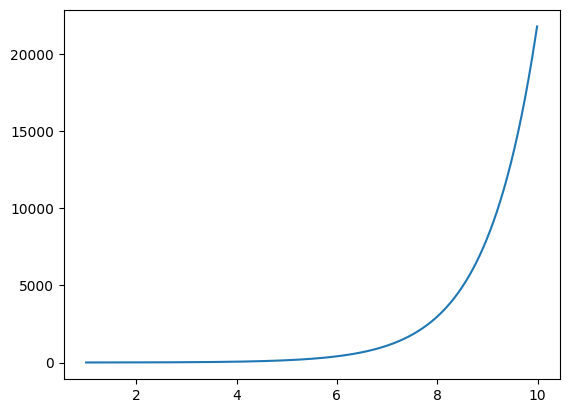

In [163]:
plt.plot(X, y)

In [164]:
0.99999999999**100000

0.9999990000004173

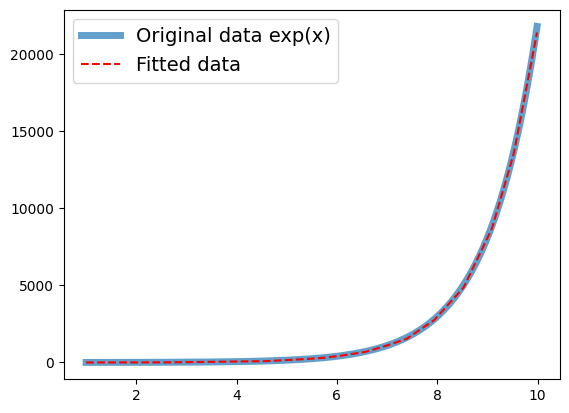

In [165]:
plt.plot(X, y, label="Original data exp(x)", linewidth=5, alpha=.7)
plt.plot(X, data, label="Fitted data", linestyle="--", c="r")
plt.legend(fontsize=14)

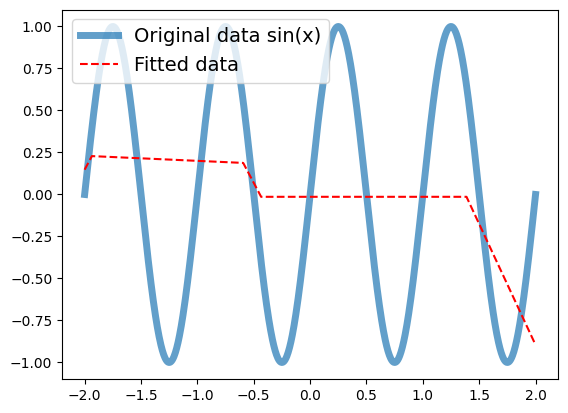

In [ ]:
y_pred = np.load("sin_pred.npy")
X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.sin(X * 2 * np.pi) #+ np.random.normal(0, 0.1, X.shape)
plt.plot(X, y, label="Original data sin(x)", linewidth=5, alpha=.7)
plt.plot(X, y_pred, label="Fitted data", linestyle="--", c="r")
plt.legend(fontsize=14, loc="upper left")

In [167]:
import os
grads = []

for f in os.listdir("."):
    if f.endswith(".npy") and f.startswith("grad"):
        data = np.load(f)
        grads.append(data)

In [168]:
def get_layer_names(i):
    return [f"layer{i}_biases_grad.npy", f"layer{i}_biases_approx_grad.npy"], [f"layer{i}_weights_grad.npy", f"layer{i}_weights_approx_grad.npy"]
    

In [169]:
def rel_error(grad, approx_grad):
    return np.abs(grad - approx_grad) / np.maximum(np.abs(grad) + np.abs(approx_grad), 1e-8)

In [170]:
for i in range(3):
    biases, weights = get_layer_names(i)
    bias_grad = np.load(biases[0])
    bias_approx_grad = np.load(biases[1])
    weight_grad = np.load(weights[0])
    weight_approx_grad = np.load(weights[1])

    # Compute relative distances
    bias_diff = rel_error(bias_grad, bias_approx_grad)
    weight_diff = rel_error(weight_grad, weight_approx_grad)
    
    print(f"Layer {i} Biases Relative Error: {np.mean(bias_diff)}")
    print(f"Layer {i} Weights Relative Error: {np.mean(weight_diff)}")    

Layer 0 Biases Relative Error: 5.099856905422433e-12
Layer 0 Weights Relative Error: 1.133074571012515e-11
Layer 1 Biases Relative Error: 1.768771343023442e-10
Layer 1 Weights Relative Error: 7.290207687399293e-10
Layer 2 Biases Relative Error: 4.5220331506740634e-12
Layer 2 Weights Relative Error: 9.936674887133054e-12


In [171]:
l0_grad_bias = np.load("layer0_biases_grad.npy")
l0_grad_weights = np.load("layer0_weights_grad.npy")
l0_agrad_bias = np.load("layer0_biases_approx_grad.npy")
l0_agrad_weights = np.load("layer0_weights_approx_grad.npy")

In [172]:
l0_grad_bias

array([[-0.10515713,  0.10515713]])

In [173]:
l0_agrad_bias

array([[-0.10515713,  0.10515713]])

In [174]:
rel_error(l0_grad_bias, l0_agrad_bias), rel_error(l0_grad_weights, l0_agrad_weights)

(array([[5.09985691e-12, 5.09985691e-12]]),
 array([[1.22651890e-11, 1.22651890e-11],
        [1.03963024e-11, 1.03963024e-11]]))

In [175]:
losses = np.load("losses.npy")
accs = np.load("accuracies.npy")

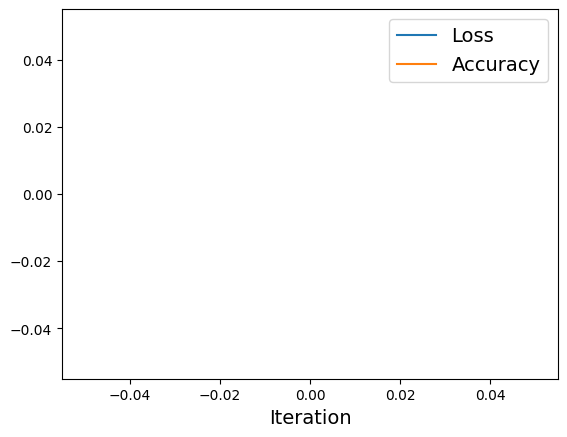

In [176]:
plt.plot(losses, label="Loss")
plt.plot(accs, label="Accuracy")
plt.xlabel("Iteration", fontsize=14)
plt.legend(fontsize=14)